# Indian EV Market Segmentation

### Problem Statement

An electric vehicle (EV) startup is exploring opportunities in the rapidly growing Indian EV market, which is still in its early development phase. To inform our strategy, we will analyze the market and identify key segments that are poised for EV adoption.

The Indian EV market can be segmented based on the following criteria:
1. Vehicle Type: This includes two-wheelers, three-wheelers, passenger cars, and commercial vehicles. Currently, two-wheelers dominate the market, followed by three-wheelers. Passenger cars and commercial vehicles are still emerging segments.

2. Customer Segmentation: We will also consider customer types based on behavioral data, allowing us to tailor our approach to specific consumer needs and preferences.

By assessing these segments, we aim to develop a viable market entry strategy that positions our startup competitively within the Indian EV landscape.


### Data Sources

source 1:

source 2:

.

.

.


### Segmentation Based on User Sentiments

##### Step 1: Deciding (not) to Segment

The EV startup faces two strategic paths: it can choose a broad market strategy, operating under the assumption that understanding user sentiments is not essential, or it can embrace the importance of these sentiments. By adopting a differentiated marketing approach, the startup can better respond to the diverse preferences and attitudes of potential EV customers in India, thereby strengthening its competitive advantage in the market.

##### Step 2: Specifying the Ideal Target Segment

The EV startup must identify the key characteristics that make specific market segments appealing, focusing on essential criteria. Ideal target segments should be homogeneous, distinct, sufficiently large to justify a tailored marketing strategy, aligned with the startup's strengths, easily identifiable among consumers, and reachable through suitable communication channels. Attractiveness criteria include a positive perception of electric vehicles and a propensity for adoption. Additionally, the startup may consider segments that currently have reservations about EVs, seeking to understand and address those concerns. For this analysis, the emphasis will be on segments that have a favorable view of EVs and show a strong intent to adopt them, guiding the selection of target segments.

##### Step 3: Collecting Data

https://www.kaggle.com/datasets/deadprstkrish/ev-cars-user-reviews-india

##### Step 4: Exploring Data

The initial step involves loading the dataset and examining its key characteristics, including variable names, sample size, and the first three rows. This exploration helps establish an understanding of the dataset's structure and content.

In [1]:
# Loading Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample
from sklearn.mixture import GaussianMixture
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.mosaicplot import mosaic

In [3]:
# Loading Data
df_2w = pd.read_csv('2-wheeler-EV-bikewale.csv')
df_4w = pd.read_csv('4-wheeler-EV-carwale.csv')

In [4]:
# Viewing 2 Wheeler Data
df_2w

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder


In [5]:
# Viewing 4 Wheeler Data
df_4w

,review,Exterior,Comfort,Performance,Fuel Economy,Value for Money,Condition,driven,rating,model_name
0,Superb car like as fantastic as petroleum car....,5.0,4.0,5.0,5.0,5.0,New,Few hundred kilometers,5.0,hyundai kona
1,"Anti national, worst service, worst customer c...",1.0,1.0,1.0,1.0,1.0,New,Haven't driven it,0.0,hyundai kona
2,Super happy with it. The car is too good,4.0,5.0,5.0,5.0,4.0,New,Few thousand kilometers,5.0,hyundai kona
3,"Pretty good car, smooth as a glider fast car, ...",5.0,5.0,5.0,5.0,5.0,New,Few thousand kilometers,5.0,hyundai kona
4,Price difference between petrol and electronic...,4.0,4.0,5.0,3.0,2.0,Not Purchased,Haven't driven it,3.0,hyundai kona
...,...,...,...,...,...,...,...,...,...,...
124,A good car but overpriced a little. The starti...,5.0,4.0,4.0,4.0,3.0,New,Did a short drive once,4.0,tata tigor ev
125,Excellent vehicle driving dynamics and EVs are...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Did a short drive once,5.0,tata tigor ev
126,After government subsidy it becomes cheaper th...,5.0,5.0,5.0,5.0,5.0,Not Purchased,Did a short drive once,5.0,tata tigor ev
127,Yes I love tata products .. A true Indian comp...,4.0,4.0,4.0,5.0,5.0,Not Purchased,Haven't driven it,5.0,tata tigor ev


In [6]:
# Dropping irrelevant columns from both data sets
df_2w = df_2w.drop(columns=['review','Owned for','Ridden for','Model Name'])
df_4w = df_4w.drop(columns=['review','Condition','driven','model_name'])

In [7]:
# Changing position of the rating column
column_to_move = df_2w.columns[1]  # Get the 2nd column name
df_2w[column_to_move] = df_2w.pop(column_to_move) # Move it to last position

In [8]:
# Checking both dataset info
print(df_2w.info())
print(df_4w.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Used it for         844 non-null    object 
 1   Visual Appeal       739 non-null    float64
 2   Reliability         716 non-null    float64
 3   Performance         345 non-null    float64
 4   Service Experience  703 non-null    float64
 5   Extra Features      185 non-null    float64
 6   Comfort             530 non-null    float64
 7   Maintenance cost    180 non-null    float64
 8   Value for Money     390 non-null    float64
 9   rating              844 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 66.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exterior         129 non-null    float

In [9]:
# Checking % of NA in each column for both datasets
na_per_2w = df_2w.isna().mean() * 100
na_per_4w = df_4w.isna().mean() * 100
print(na_per_2w)
print(na_per_4w)

Used it for            0.000000
Visual Appeal         12.440758
Reliability           15.165877
Performance           59.123223
Service Experience    16.706161
Extra Features        78.080569
Comfort               37.203791
Maintenance cost      78.672986
Value for Money       53.791469
rating                 0.000000
dtype: float64
Exterior           0.0
Comfort            0.0
Performance        0.0
Fuel Economy       0.0
Value for Money    0.0
rating             0.0
dtype: float64


Since the size variation is too big between the two data sets and the larget dataset has a lot of missing values, we can safely shrink down the larger dataset and hadel missing values by doing the following:

In [10]:
# Fill columns with less than 25% NA with mode, and drop rows for others
for column in df_2w.columns:
    if na_per_2w[column] < 25:
        mode_series = df_2w[column].mode()
        if not mode_series.empty:  # Check if mode is not empty
            mode_value = mode_series[0]  # Get the mode
            df_2w[column].fillna(mode_value, inplace=True)  # Fill NA with mode


In [11]:
# Check all the non null columns
df_2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Used it for         844 non-null    object 
 1   Visual Appeal       844 non-null    float64
 2   Reliability         844 non-null    float64
 3   Performance         345 non-null    float64
 4   Service Experience  844 non-null    float64
 5   Extra Features      185 non-null    float64
 6   Comfort             530 non-null    float64
 7   Maintenance cost    180 non-null    float64
 8   Value for Money     390 non-null    float64
 9   rating              844 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 66.1+ KB


In [12]:
# Drop na rows from one column
df_2w.dropna(subset=['Comfort'], inplace=True)

In [13]:
# Check all the non null columns
df_2w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 0 to 843
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Used it for         530 non-null    object 
 1   Visual Appeal       530 non-null    float64
 2   Reliability         530 non-null    float64
 3   Performance         140 non-null    float64
 4   Service Experience  530 non-null    float64
 5   Extra Features      0 non-null      float64
 6   Comfort             530 non-null    float64
 7   Maintenance cost    0 non-null      float64
 8   Value for Money     382 non-null    float64
 9   rating              530 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 45.5+ KB


In [14]:
# Drop na rows from another column
df_2w.dropna(subset=['Performance'], inplace=True)

In [15]:
# Check all the non null columns
df_2w.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 18 to 718
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Used it for         140 non-null    object 
 1   Visual Appeal       140 non-null    float64
 2   Reliability         140 non-null    float64
 3   Performance         140 non-null    float64
 4   Service Experience  140 non-null    float64
 5   Extra Features      0 non-null      float64
 6   Comfort             140 non-null    float64
 7   Maintenance cost    0 non-null      float64
 8   Value for Money     0 non-null      float64
 9   rating              140 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 12.0+ KB


In [16]:
# Drop all the columns that have zero non null values
df_2w.drop(columns=['Extra Features','Maintenance cost','Value for Money'],inplace=True)

All the missing values are handled and both data sets are of similar size. Now we can start exploring both data sets in more detail

In [17]:
# Checking both dataset info
print(df_2w.info())
print(df_4w.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 18 to 718
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Used it for         140 non-null    object 
 1   Visual Appeal       140 non-null    float64
 2   Reliability         140 non-null    float64
 3   Performance         140 non-null    float64
 4   Service Experience  140 non-null    float64
 5   Comfort             140 non-null    float64
 6   rating              140 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Exterior         129 non-null    float64
 1   Comfort          129 non-null    float64
 2   Performance      129 non-null    float64
 3   Fuel Economy     129 non-null    float64
 4   Value f

In [18]:
# Checking unique values in all the columns across both data sets
print('For the 2 wheeler data set:\n')
for column in df_2w.columns:
    unique = df_2w[column].unique()
    print(f"Unique Values in '{column}' column: {unique}")

print('\nFor the 4 wheeler data set:\n')
for column in df_4w.columns:
    unique = df_4w[column].unique()
    print(f"Unique Values in '{column}' column: {unique}")

For the 2 wheeler data set:

Unique Values in 'Used it for' column: ['Everything' 'Daily Commute' 'Leisure Rides' 'Occasional Commute']
Unique Values in 'Visual Appeal' column: [5. 4. 2. 1. 3.]
Unique Values in 'Reliability' column: [5. 4. 1. 3. 2.]
Unique Values in 'Performance' column: [5. 1. 3. 4. 2.]
Unique Values in 'Service Experience' column: [5. 3. 2. 1. 4.]
Unique Values in 'Comfort' column: [5. 4. 3. 1. 2.]
Unique Values in 'rating' column: [5 1 3 4 2]

For the 4 wheeler data set:

Unique Values in 'Exterior' column: [5. 1. 4. 3. 0. 2.]
Unique Values in 'Comfort' column: [4. 1. 5. 3. 2. 0.]
Unique Values in 'Performance' column: [5. 1. 4. 2. 3. 0.]
Unique Values in 'Fuel Economy' column: [5. 1. 3. 4. 0. 2.]
Unique Values in 'Value for Money' column: [5. 1. 4. 2. 3. 0.]
Unique Values in 'rating' column: [5. 0. 3. 4. 2.]


In [19]:
# Convert all columns to int except for 'Used it for' and 'rating'
cols_to_exclude_2w = ['Used it for', 'rating']
cols_to_exclude_4w = ['rating']

df_2w_comp = df_2w.drop(columns=cols_to_exclude_2w).astype(int)
df_4w_comp = df_4w.drop(columns=cols_to_exclude_4w).astype(int)


In [20]:
# Checking both dataset info
print(df_2w_comp.info())
print(df_4w_comp.info())

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 18 to 718
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Visual Appeal       140 non-null    int32
 1   Reliability         140 non-null    int32
 2   Performance         140 non-null    int32
 3   Service Experience  140 non-null    int32
 4   Comfort             140 non-null    int32
dtypes: int32(5)
memory usage: 3.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Exterior         129 non-null    int32
 1   Comfort          129 non-null    int32
 2   Performance      129 non-null    int32
 3   Fuel Economy     129 non-null    int32
 4   Value for Money  129 non-null    int32
dtypes: int32(5)
memory usage: 2.6 KB
None


In [21]:
# Checking average values in all the columns across both data sets
print('For the 2 wheeler data set:\n')
for column in df_2w_comp.columns:
    unique = df_2w_comp[column].mean()
    print(f"Average value in '{column}' column: {round(unique,1)}")

print('\nFor the 4 wheeler data set:\n')
for column in df_4w_comp.columns:
    unique = df_4w_comp[column].mean()
    print(f"Average value in '{column}' column: {round(unique,1)}")

For the 2 wheeler data set:

Average value in 'Visual Appeal' column: 4.2
Average value in 'Reliability' column: 3.8
Average value in 'Performance' column: 4.0
Average value in 'Service Experience' column: 3.6
Average value in 'Comfort' column: 4.0

For the 4 wheeler data set:

Average value in 'Exterior' column: 4.5
Average value in 'Comfort' column: 4.4
Average value in 'Performance' column: 4.4
Average value in 'Fuel Economy' column: 4.4
Average value in 'Value for Money' column: 4.2


In [22]:
# Performing PCA on both datasets
pca_2w = PCA()
pca_4w = PCA()

pca_2w.fit(df_2w_comp)
pca_4w.fit(df_4w_comp)

# Getting the explained variance and other metrics
explained_variance_2w = pca_2w.explained_variance_
explained_variance_ratio_2w = pca_2w.explained_variance_ratio_
cumulative_variance_2w = explained_variance_ratio_2w.cumsum()

explained_variance_4w = pca_4w.explained_variance_
explained_variance_ratio_4w = pca_4w.explained_variance_ratio_
cumulative_variance_4w = explained_variance_ratio_4w.cumsum()

# Creating a summary DataFrame
summary_df_2w = pd.DataFrame({
    'Standard Deviation': np.sqrt(explained_variance_2w),
    'Proportion of Variance': explained_variance_ratio_2w,
    'Cumulative Proportion': cumulative_variance_2w
})

summary_df_4w = pd.DataFrame({
    'Standard Deviation': np.sqrt(explained_variance_4w),
    'Proportion of Variance': explained_variance_ratio_4w,
    'Cumulative Proportion': cumulative_variance_4w
})

In [23]:
summary_df_2w

,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,2.634905,0.802818,0.802818
1,0.798020,0.073640,0.876458
2,0.682764,0.053905,0.930363
3,0.577745,0.038598,0.968960
4,0.518100,0.031040,1.000000


In [24]:
summary_df_4w

,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,2.318130,0.838905,0.838905
1,0.634648,0.062879,0.901783
2,0.536859,0.044994,0.946778
3,0.471836,0.034755,0.981533
4,0.343938,0.018467,1.000000


In [25]:
# Transposing the DataFrames
summary_df_2w_transposed = summary_df_2w.transpose()
summary_df_4w_transposed = summary_df_4w.transpose()


# Renaming columns to PCA1 to PCA11
summary_df_2w_transposed.columns = [f'PCA{i+1}' for i in range(len(summary_df_2w_transposed.columns))]
summary_df_4w_transposed.columns = [f'PCA{i+1}' for i in range(len(summary_df_4w_transposed.columns))]

In [26]:
summary_df_2w_transposed

,PCA1,PCA2,PCA3,PCA4,PCA5
Standard Deviation,2.634905,0.798020,0.682764,0.577745,0.51810
Proportion of Variance,0.802818,0.073640,0.053905,0.038598,0.03104
Cumulative Proportion,0.802818,0.876458,0.930363,0.968960,1.00000


In [27]:
summary_df_4w_transposed

,PCA1,PCA2,PCA3,PCA4,PCA5
Standard Deviation,2.318130,0.634648,0.536859,0.471836,0.343938
Proportion of Variance,0.838905,0.062879,0.044994,0.034755,0.018467
Cumulative Proportion,0.838905,0.901783,0.946778,0.981533,1.000000


In [28]:
# Extracting PCA results
standard_deviation_2w = np.sqrt(explained_variance_2w)
loadings_2w = pca_2w.components_.T

standard_deviation_4w = np.sqrt(explained_variance_4w)
loadings_4w = pca_4w.components_.T

# Creating a summary DataFrame for standard deviations
std_dev_df_2w = pd.DataFrame(standard_deviation_2w, columns=['Standard Deviation'])
std_dev_df_2w.index = [f'PC{i+1}' for i in range(len(std_dev_df_2w))]

std_dev_df_4w = pd.DataFrame(standard_deviation_4w, columns=['Standard Deviation'])
std_dev_df_4w.index = [f'PC{i+1}' for i in range(len(std_dev_df_4w))]

# Creating a DataFrame for loadings
loadings_df_2w = pd.DataFrame(loadings_2w, index=df_2w_comp.columns, columns=[f'PC{i+1}' for i in range(loadings_2w.shape[1])])
loadings_df_4w = pd.DataFrame(loadings_4w, index=df_4w_comp.columns, columns=[f'PC{i+1}' for i in range(loadings_4w.shape[1])])

In [29]:
# Displaying standard deviations 
std_dev_df_2w.round(1).transpose()

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,2.6,0.8,0.7,0.6,0.5


In [30]:
std_dev_df_4w.round(1).transpose()

,PC1,PC2,PC3,PC4,PC5
Standard Deviation,2.3,0.6,0.5,0.5,0.3


In [31]:
# Displaying and loadings
loadings_df_2w.round(3)

,PC1,PC2,PC3,PC4,PC5
Visual Appeal,-0.383,-0.462,-0.667,-0.369,0.242
Reliability,-0.480,-0.019,0.664,-0.425,0.384
Performance,-0.449,-0.365,0.177,0.083,-0.792
Service Experience,-0.473,0.805,-0.289,-0.113,-0.179
Comfort,-0.444,-0.070,-0.014,0.814,0.366


In [32]:
loadings_df_4w.round(3)

,PC1,PC2,PC3,PC4,PC5
Exterior,-0.370,0.505,0.270,0.385,0.622
Comfort,-0.413,0.424,0.140,0.194,-0.770
Performance,-0.462,0.133,0.081,-0.865,0.118
Fuel Economy,-0.438,-0.064,-0.880,0.153,0.078
Value for Money,-0.536,-0.738,0.356,0.205,-0.002


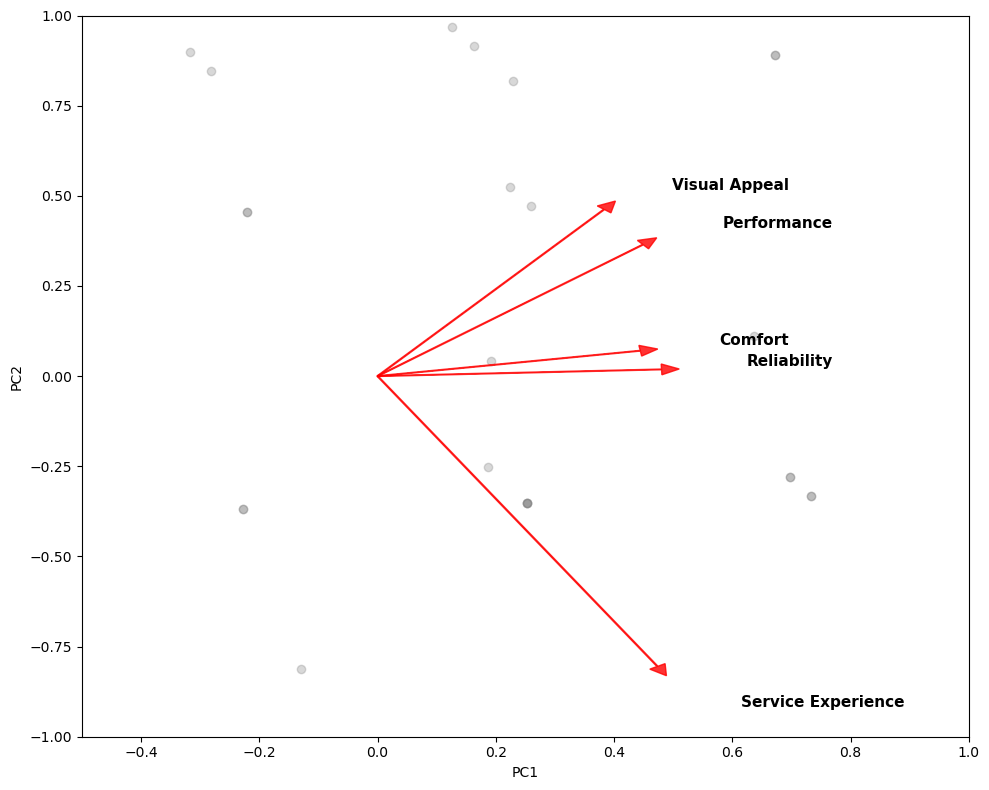

In [33]:
# Perform PCA and plot data points for 2 wheeler dataset
pca_2w = PCA()
pca_result_2w = pca_2w.fit_transform(df_2w_comp)
pca_2w.components_[0] *= -1
pca_2w.components_[1] *= -1
pca_result_2w *= -1
plt.figure(figsize=(10, 8))
# Plot the PCA scatter plot (data points)
plt.scatter(pca_result_2w[:, 0], pca_result_2w[:, 1], alpha=0.3, color='grey')

# Plot feature vectors with adjusted line width and arrow size
for i, feature in enumerate(df_2w_comp.columns):
    # Scale and plot the arrows with thinner lines and smaller arrowheads
    plt.arrow(0, 0, pca_2w.components_[0, i], pca_2w.components_[1, i], 
              color='r', alpha=0.8, width=0.002, head_width=0.03, head_length=0.03)
    
# Plot the labels on top, ensuring they are not hidden by arrows
for i, feature in enumerate(df_2w_comp.columns):
    # Calculate label position with the same scaling factor
    label_x = pca_2w.components_[0, i] * 1.3
    label_y = pca_2w.components_[1, i] * 1.1
    
    # Adjust positions based on quadrants for better readability
    ha = 'right' if pca_2w.components_[0, i] < 0 else 'left'
    va = 'top' if pca_2w.components_[1, i] < 0 else 'bottom'
    
    # Plot the labels with black color and a slightly larger font
    plt.text(label_x, label_y, feature, color='black', ha=ha, va=va, fontsize=11, fontweight='bold')

# Set limits for x and y axes
plt.xlim(-0.5, 1)
plt.ylim(-1, 1)

# Add grid, axis lines, and labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

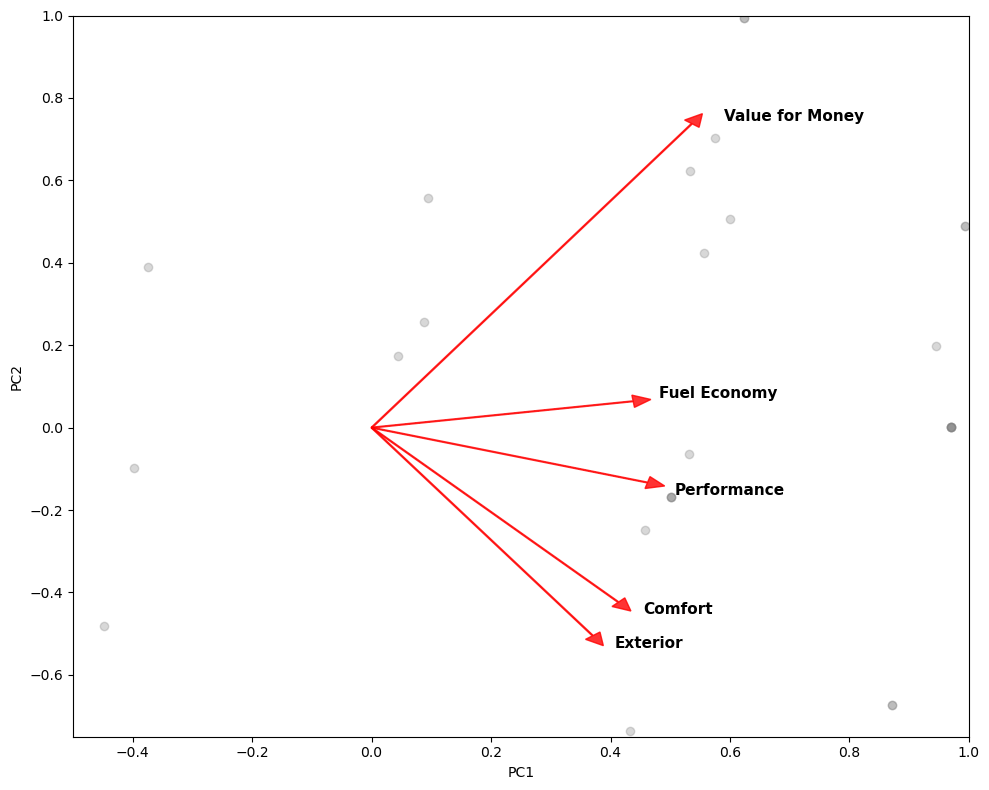

In [34]:
# Perform PCA and plot data points for 4 wheeler dataset
pca_4w = PCA()
pca_result_4w = pca_4w.fit_transform(df_4w_comp)
pca_4w.components_[0] *= -1
pca_4w.components_[1] *= -1
pca_result_4w *= -1
plt.figure(figsize=(10, 8))
# Plot the PCA scatter plot (data points)
plt.scatter(pca_result_4w[:, 0], pca_result_4w[:, 1], alpha=0.3, color='grey')

# Plot feature vectors with adjusted line width and arrow size
for i, feature in enumerate(df_4w_comp.columns):
    # Scale and plot the arrows with thinner lines and smaller arrowheads
    plt.arrow(0, 0, pca_4w.components_[0, i], pca_4w.components_[1, i], 
              color='r', alpha=0.8, width=0.002, head_width=0.03, head_length=0.03)
    
# Plot the labels on top, ensuring they are not hidden by arrows
for i, feature in enumerate(df_4w_comp.columns):
    # Calculate label position with the same scaling factor
    label_x = pca_4w.components_[0, i] * 1.1
    label_y = pca_4w.components_[1, i] * 1
    
    # Adjust positions based on quadrants for better readability
    ha = 'right' if pca_4w.components_[0, i] < 0 else 'left'
    va = 'top' if pca_4w.components_[1, i] < 0 else 'bottom'
    
    # Plot the labels with black color and a slightly larger font
    plt.text(label_x, label_y, feature, color='black', ha=ha, va=va, fontsize=11, fontweight='bold')

# Set limits for x and y axes
plt.xlim(-0.5, 1)
plt.ylim(-0.75, 1)

# Add grid, axis lines, and labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.tight_layout()
plt.show()

In [35]:
# Set random seed for reproducibility
random_state = 1234
np.random.seed(random_state)

# Store the WCSS (inertia) values for each number of clusters
wcss_2w = []
wcss_4w = []

# Perform KMeans
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    kmeans.fit(df_2w_comp)
    wcss_2w.append(kmeans.inertia_)

for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_state)
    kmeans.fit(df_4w_comp)
    wcss_4w.append(kmeans.inertia_)

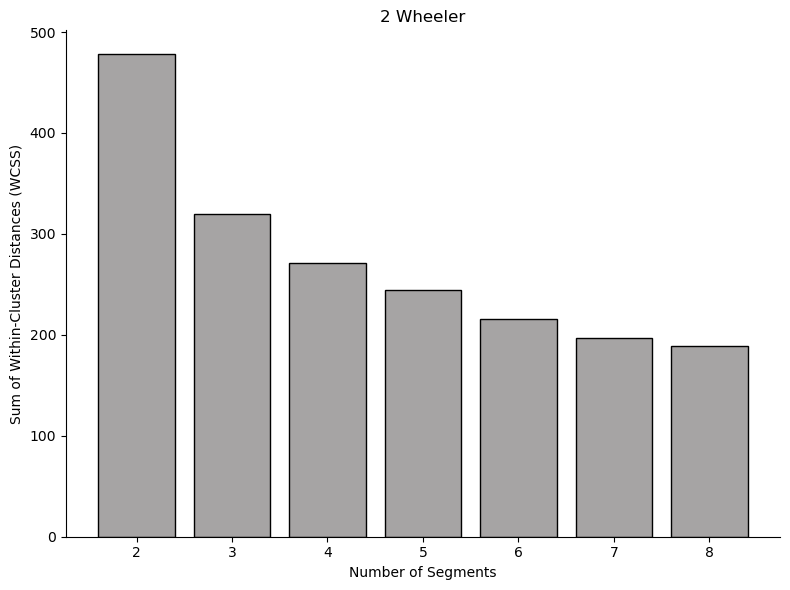

In [36]:
# Plot the WCSS values as a bar chart for 2 wheeler dataset
plt.figure(figsize=(8, 6))
bars = plt.bar(range(2, 9), wcss_2w, color='#a6a4a4', edgecolor='black')

# Customize the plot
plt.title('2 Wheeler')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within-Cluster Distances (WCSS)')
plt.xticks(range(2, 9))

# Remove grid lines and axis lines
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

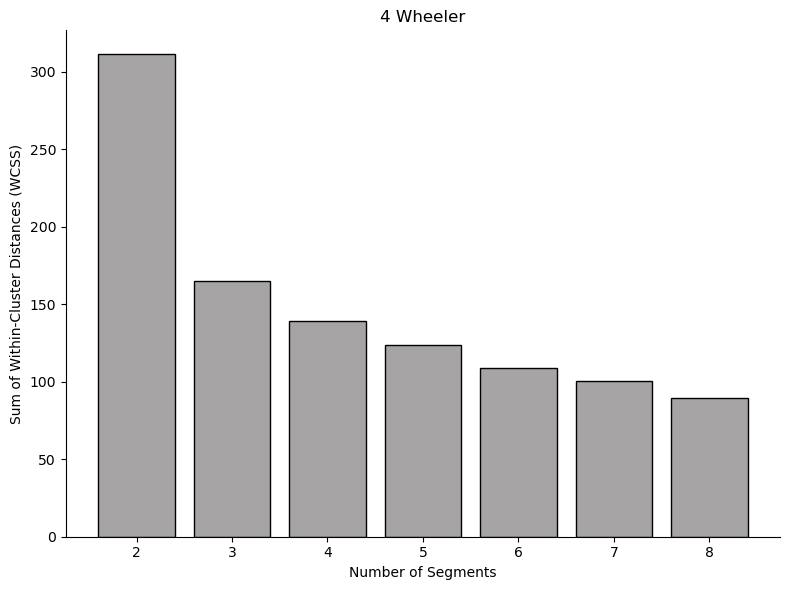

In [37]:
# Plot the WCSS values as a bar chart for 4 wheeler dataset
plt.figure(figsize=(8, 6))
bars = plt.bar(range(2, 9), wcss_4w, color='#a6a4a4', edgecolor='black')

# Customize the plot
plt.title('4 Wheeler')
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within-Cluster Distances (WCSS)')
plt.xticks(range(2, 9))

# Remove grid lines and axis lines
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

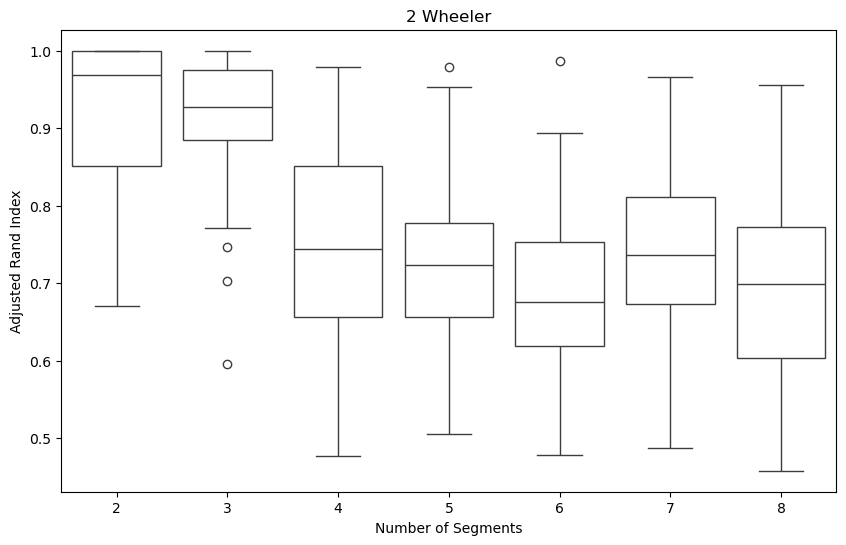

In [38]:
# Function to perform KMeans clustering and return the cluster labels
def kmeans_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=random_state)
    return kmeans.fit_predict(data)

# Store ARI values for each number of clusters
ari_results = {k: [] for k in range(2, 9)}

# Bootstrapping for 2 wheeler dataset
n_boot = 100
for k in range(2, 9):
    # First, fit the KMeans on the original data to get the true labels
    original_labels = kmeans_clustering(df_2w_comp, k)
    
    for _ in range(n_boot):
        # Bootstrap sample
        sample_indices = resample(np.arange(df_2w_comp.shape[0]), replace=True)
        sample = df_2w_comp.iloc[sample_indices]
        
        # Perform KMeans on the bootstrap sample
        sample_labels = kmeans_clustering(sample, k)
        
        # Compute ARI using the original labels matched to the bootstrap sample
        ari = adjusted_rand_score(sample_labels, original_labels[sample_indices])
        ari_results[k].append(ari)

# Convert results to a DataFrame for plotting
ari_df = pd.DataFrame(ari_results)

# Plot the ARI results as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=ari_df, color='white')
plt.title('2 Wheeler')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.xticks(ticks=np.arange(0, 7), labels=range(2, 9))
plt.show()

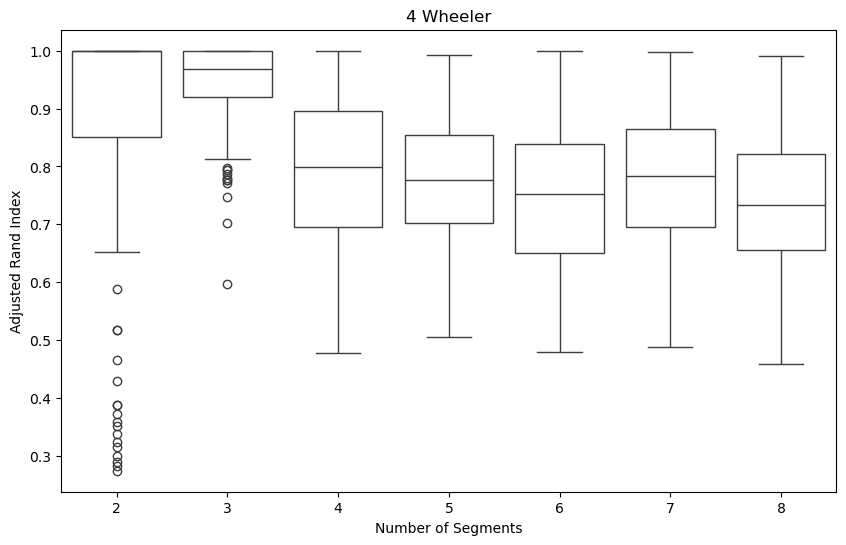

In [39]:
# Bootstrapping for 4 wheeler dataset
n_boot = 100
for k in range(2, 9):
    # First, fit the KMeans on the original data to get the true labels
    original_labels = kmeans_clustering(df_4w_comp, k)
    
    for _ in range(n_boot):
        # Bootstrap sample
        sample_indices = resample(np.arange(df_4w_comp.shape[0]), replace=True)
        sample = df_4w_comp.iloc[sample_indices]
        
        # Perform KMeans on the bootstrap sample
        sample_labels = kmeans_clustering(sample, k)
        
        # Compute ARI using the original labels matched to the bootstrap sample
        ari = adjusted_rand_score(sample_labels, original_labels[sample_indices])
        ari_results[k].append(ari)

# Convert results to a DataFrame for plotting
ari_df = pd.DataFrame(ari_results)

# Plot the ARI results as boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=ari_df, color='white')
plt.title('4 Wheeler')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.xticks(ticks=np.arange(0, 7), labels=range(2, 9))
plt.show()

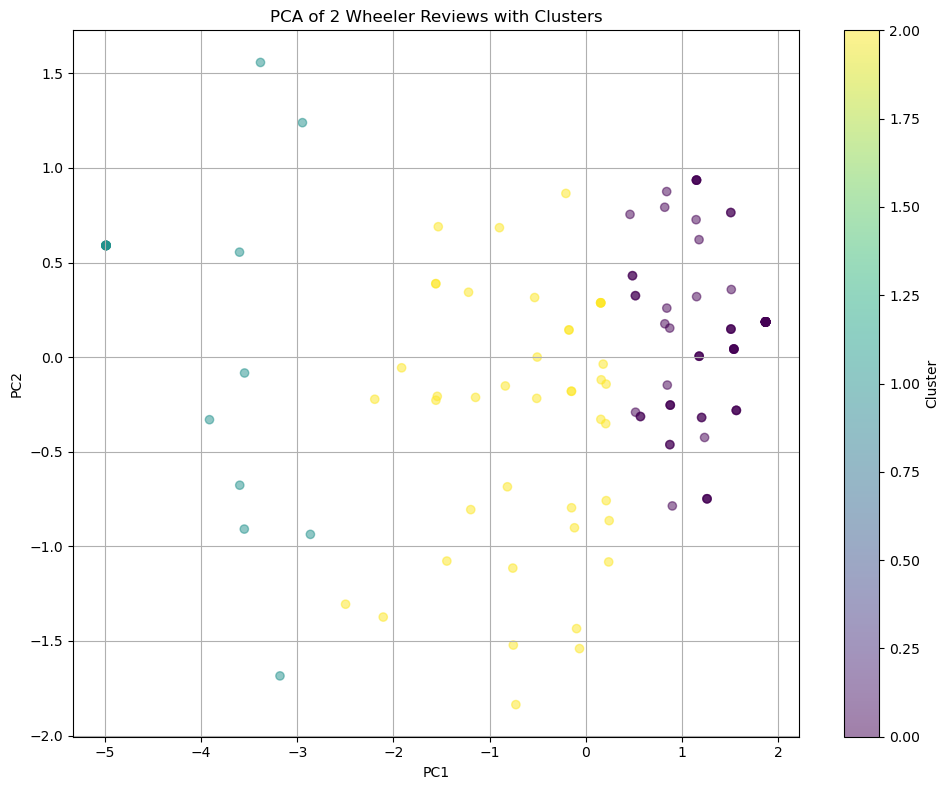

In [40]:
# Standardizing the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(df_2w_comp)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(MD_x_scaled)

# Invert components for visualization consistency
pca.components_[0] *= -1
pca.components_[1] *= -1
pca_result *= -1

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_2w['cluster'] = kmeans.fit_predict(MD_x_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
# Plot the PCA scatter plot (data points) colored by cluster
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_2w['cluster'], cmap='viridis', alpha=0.5)

# Add color bar, grid, axis lines, and labels
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of 2 Wheeler Reviews with Clusters')
plt.grid()
plt.tight_layout()
plt.show()

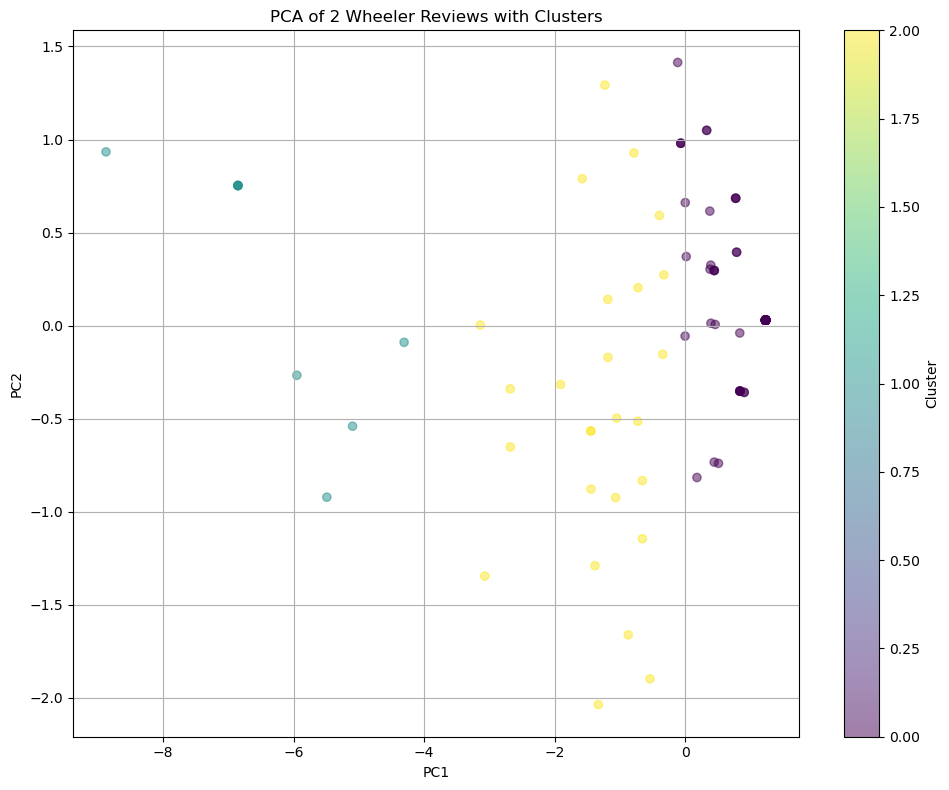

In [41]:
# Standardizing the data
scaler = StandardScaler()
MD_x_scaled = scaler.fit_transform(df_4w_comp)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(MD_x_scaled)

# Invert components for visualization consistency
pca.components_[0] *= -1
pca.components_[1] *= -1
pca_result *= -1

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_4w['cluster'] = kmeans.fit_predict(MD_x_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
# Plot the PCA scatter plot (data points) colored by cluster
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_4w['cluster'], cmap='viridis', alpha=0.5)

# Add color bar, grid, axis lines, and labels
plt.colorbar(scatter, label='Cluster')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of 2 Wheeler Reviews with Clusters')
plt.grid()
plt.tight_layout()
plt.show()

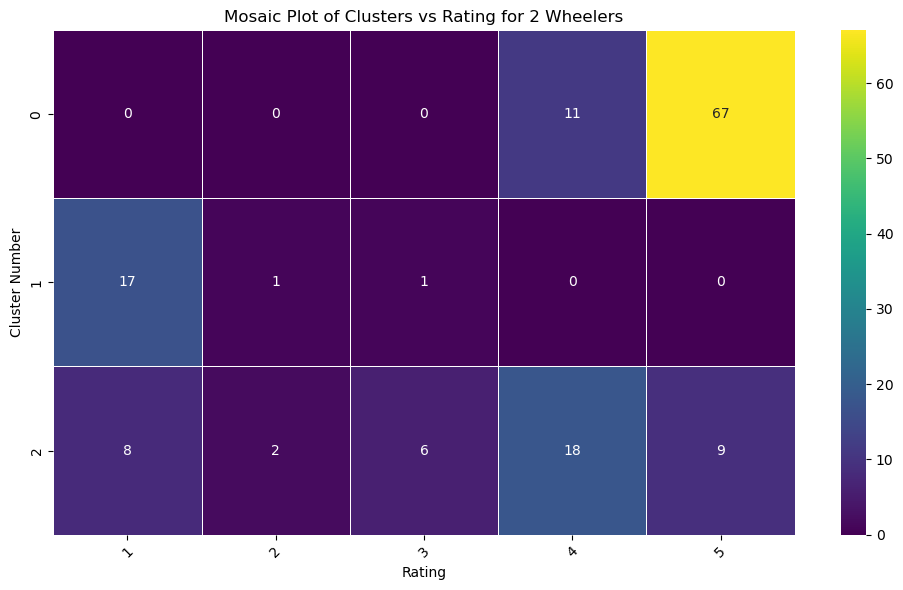

In [42]:
# contingency table for 2 wheeler dataset
df = df_2w
contingency_table = pd.crosstab(df['cluster'], df['rating'])

# Create a mosaic plot using seaborn or matplotlib
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis', cbar=True, linewidths=0.5)
plt.title('Mosaic Plot of Clusters vs Rating for 2 Wheelers')
plt.xlabel('Rating')
plt.ylabel('Cluster Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

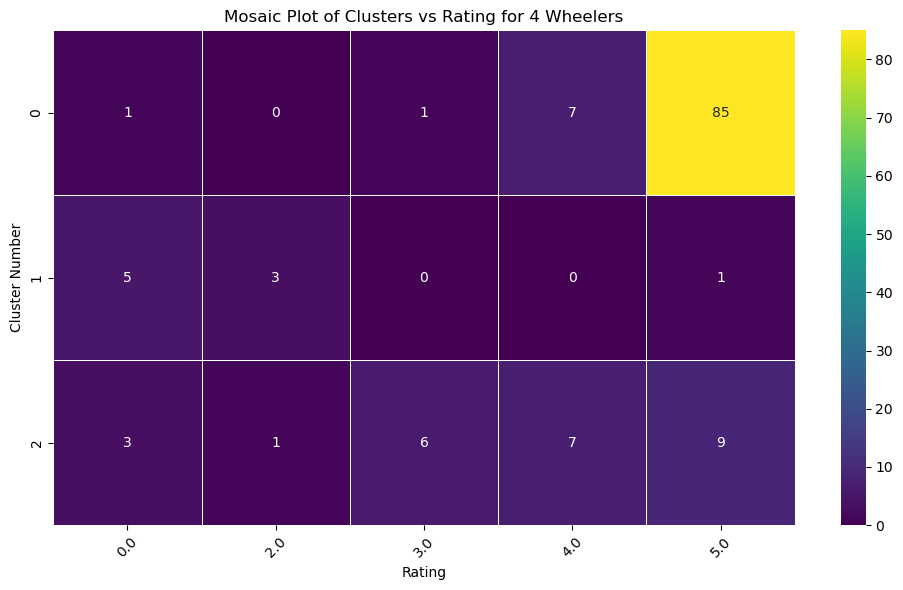

In [43]:
# contingency table for 4 wheeler dataset
df = df_4w
contingency_table = pd.crosstab(df['cluster'], df['rating'])

# Create a mosaic plot using seaborn or matplotlib
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='viridis', cbar=True, linewidths=0.5)
plt.title('Mosaic Plot of Clusters vs Rating for 4 Wheelers')
plt.xlabel('Rating')
plt.ylabel('Cluster Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

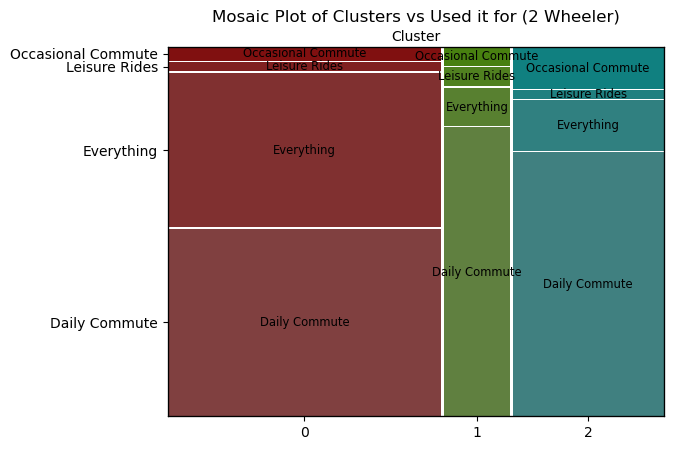

In [45]:
# Create a contingency table for clusters and Gender
df = df_2w
contingency_table_gender = pd.crosstab(df['cluster'], df['Used it for'])

# Create a labelizer function to show only "Used it for" labels
def labelizer(x):
    return x[1]  # Only return the second part of the tuple (i.e., "Used it for" label)

# Create a mosaic plot
plt.figure(figsize=(10, 6))
mosaic(contingency_table_gender.stack(), title='Mosaic Plot of Clusters vs Used it for (2 Wheeler)',
       axes_label=['Cluster'], labelizer=labelizer)

plt.xlabel('Cluster')
plt.show()